<a href="https://colab.research.google.com/github/murakami-tatsumi/colab/blob/master/%E3%83%95%E3%82%A1%E3%83%83%E3%82%B7%E3%83%A7%E3%83%B3%E7%94%BB%E5%83%8F%E3%82%92%E5%88%86%E9%A1%9E%E3%81%99%E3%82%8B_%E3%81%AECNN%E7%89%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2018 The TensorFlow Authors.

##### Modifications Copyright 2019 Tomoaki Masuda.

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [0]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

このノートブックは、以下のノートブックを元に日本語訳、一部章立ての再構成、加筆を行いました。https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/basic_classification.ipynb


# はじめてのニューラルネットワークを学習する：基本の分類問題を解く



このチュートリアルでは、スニーカーやシャツなどの衣料品画像を分類するニューラルネットワークモデルの学習を試します。始めるにあたって、詳細が分からなくても心配はいりません。ノートブックでは、ざっとTensorFlowの全体を概観し、進めながら詳細を説明します。 


## A. 環境を準備する

ここでは、TensorFlowでモデルを構築・学習するための高レベルAPIである [tf.keras](https://www.tensorflow.org/guide/keras)を使います。

In [1]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


## B. データセットを準備する


### 1. データセットをインポートする


このチュートリアルでは、10カテゴリ、7万枚のグレースケール画像を含む[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)データセットを使います。データセットは、以下のような色々な衣料品の低解像度（28 x 28ピクセル）画像です。

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>図 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

 Fashion MNISTは、古典的な[MNIST](http://yann.lecun.com/exdb/mnist/)データセットの代わりに使えるものとして作られました。MNISTは機械学習を使った画像認識の "Hello, World" (最初の題材)としてよく使われます。 MNISTデータセットは、Fashion MNISTの衣料品と同じ形式で、手書き数字の画像（0、1、2...9）が含まれています。 

このチュートリアルは、Fashion MNISTを色々な使い方をしてみる、通常のMNISTよりやや難易度の高いものです。MNIST、Fashion MNIST共に、データセットは比較的小さく、アルゴリズムが予想通りに機能するかの確認に使えます。コードのテスト、デバッグには良い出発点です。 

ネットワークの学習に6万枚の画像、分類をどれだけ正確に学習したかの評価に1万枚の画像を使います。TensorFlowからFashion MNISTデータセットを直接扱えるので手軽です。以下のように、データをインポート、ロードできます。


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


データセットをロードすると、4つのNumPy配列が返されます。配列とは、たくさんの数字の並んだ集まりだと考えてください。 

-  `train_images`, `train_labels` の2配列は、つまりモデルが学習に使う学習データセットです。 
-  `test_images`, `test_labels` の2配列は、モデルがテストに使うテストデータセットです。 

画像は28 x 28 NumPyの配列です。1ピクセルに1つの数字が対応し、各ピクセルは0から255の間の値をとります。各画像には、その画像の*クラス(種類)*に応じて0から9の間の*ラベル*があります。ラベルが画像の並びに対応して並んだ配列として保存されています。


<table>
  <tr>
    <th>Label</th>
    <th>Class</th> 
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td> 
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td> 
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td> 
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td> 
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td> 
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td> 
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td> 
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td> 
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td> 
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td> 
  </tr>
</table>


それぞれの画像は、それぞれひとつの対応するラベルを持ちます。ラベルは数字としてデータセットに持たれていますが、その数字に対応する *クラス名* はデータセットに含まれていません。後で結果表示などに使うので、 `class_names` という変数に保存してとっておきましょう。 


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### 2. データセットの中身を見てみる

モデルを学習する前にデータセットのフォーマットを調べてみましょう。次のセルを実行すると、`train_images` のデータの形＝次元がわかります。トレーニングセットに6万枚の画像があり、各画像は28 x 28ピクセルで表されることが伺えます。

In [4]:
train_images.shape

(60000, 28, 28)


同様に、トレーニングセットには(画像の数に対応した)6万の画像ラベルがあります。 


In [0]:
len(train_labels)

60000


各ラベルは0から9までの整数です。 


In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)


テストセットには1万枚の画像があります。繰り返しますが、各画像は28 x 28ピクセルとして表されます。 


In [0]:
test_images.shape

(10000, 28, 28)


テストセットには(画像の数に対応した)1万の画像ラベルがあります。 


In [0]:
len(test_labels)

10000


## C. データセットを前処理する

ネットワークを学習する前に、画像に前処理を施します。学習データセットの最初の画像を見てみると、ピクセルが0から255の範囲の数字を取るとわかります。


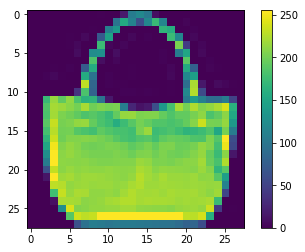

In [0]:
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

ニューラルネットワークのモデルに入力する前に、これらの値を0から1の範囲におさまるようスケーリングします。そのため、値を255で割ります。 *学習データセット*と*テストデータセット*に、同じ方法で前処理を施すことが大事です。

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0


 *学習データセット*の最初の25枚の画像を、その種別(クラス)名と共に表示してみましょう。データが正しい形式であることを確認してください。これでネットワークの構築と、学習の準備が整いました。 


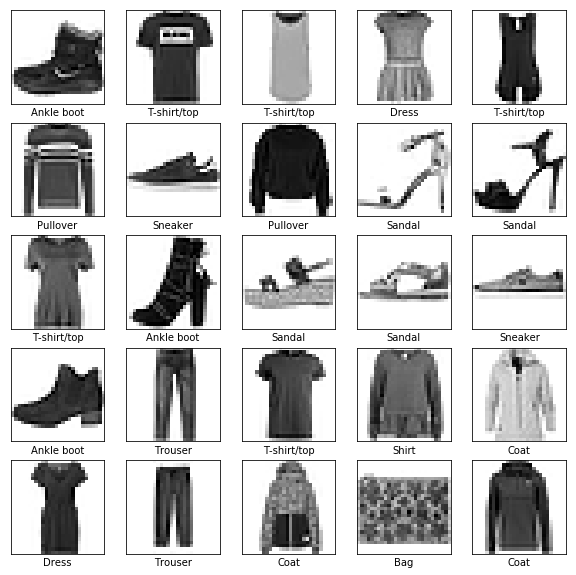

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


## D. モデルを作成する

ニューラルネットワークを構築するには、モデルのレイヤを設定し、コンパイルする必要があります。 



### 1. モデルの各層を決める

ニューラルネットワークの基本的な構成要素は*レイヤ*です。レイヤは、そこに入力されたデータから、表現を抽出します。そして、うまくいけば、これらの表現は当面の問題にとってより意味があります。 

ディープラーニングの大部分は、単純なレイヤを順番につなげていくことで構成されます。 `tf.keras.layers.Dense`などのほとんどのレイヤには、学習中に最適な値に調整されていくパラメータがあります。 


In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

W0815 07:43:41.411367 140012558731136 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation=tf.nn.relu, input_shape=(28, 28,1)),
    keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

### 2. モデルをコンパイルする

モデルのトレーニングの準備が整う前に、もう少し設定が必要です。これらの設定は、モデルの*コンパイル*段階で追加*します。 
-  *損失関数* - これは、モデルがトレーニング中にどれだけ正確であるかを測定します。この関数を最小限に抑えるよう、モデルを正しい方向に「操作」していきます。
-  *オプティマイザ* - これは、表示されるデータとその損失関数に基づいてモデルを更新する方法です。
-  *メトリックは、*トレーニングとテストの手順を監視するのに使用しました。次の例では、 *精度* 、つまり正しく分類された画像の割合を使用し*ます* 。



このネットワークの最初のレイヤである`tf.keras.layers.Flatten`は、画像のフォーマットを（28 x 28ピクセルの）2次元配列から28 * 28 = 784ピクセルの1次元配列に変換します。このレイヤを、画像内のピクセル列を積み重ねずに並べたものと考えてください。この層には学習できるパラメータ（重み）はありません。データの形を変換する役割だけを持ちます。 

ピクセルが平坦化(Flatten)された後、ネットワークは2つの`tf.keras.layers.Dense`レイヤを続けて接続します。これらは全結合層です。最初の`Dense`層には128個のノード（またはニューロン）があります。 2番目（最後）の層は10ノードの*ソフトマックス*層です。この層は、合計1になるように、10個の確率スコアの配列を返します。各ノードには、現在の画像が10個のクラスの1つに属する確率（確信度）を表すスコアが含まれます。 


In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## E. モデルを学習させる

ニューラルネットワークモデルの学習には、次の手順が必要です。 

1. 学習データをモデルに入力します。（この例では`train_images`および`train_labels`配列）
1. モデルは、画像とラベルの関連付けを学習します。 
1. モデルに、テストセット（この例では`test_images`配列）のラベルを予測させます。予測が`test_labels`配列のラベルと一致するか確認します。 

学習開始するには、 `model.fit`メソッドを呼び出します。モデルが学習データとそのラベルの関連付けを学ぶことを、「フィット(fit)」と表現します。 


In [0]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 18s 294us/sample - loss: 0.4618 - acc: 0.8351
Epoch 2/10
60000/60000 [==============================] - 15s 248us/sample - loss: 0.3091 - acc: 0.8874
Epoch 3/10
60000/60000 [==============================] - 15s 248us/sample - loss: 0.2671 - acc: 0.9017
Epoch 4/10
60000/60000 [==============================] - 15s 248us/sample - loss: 0.2336 - acc: 0.9140
Epoch 5/10
60000/60000 [==============================] - 15s 248us/sample - loss: 0.2144 - acc: 0.9215
Epoch 6/10
60000/60000 [==============================] - 15s 246us/sample - loss: 0.1953 - acc: 0.9277
Epoch 7/10
60000/60000 [==============================] - 15s 250us/sample - loss: 0.1814 - acc: 0.9328
Epoch 8/10
60000/60000 [==============================] - 15s 247us/sample - loss: 0.1695 - acc: 0.9370
Epoch 9/10
60000/60000 [==============================] - 15s 247us/sample - loss: 0.1583 - acc: 0.9413
Epoch 10/10
60000/60000 [==============================] - 15s 2


モデルの学習中に、損失と精度の数値が表示されます。このモデルは、学習データに対して約0.88（または88％）の精度に達します。 



## F. 学習済みモデルを評価する


### 1. テストデータ全体で評価する

次に、モデルがテストデータセットに対してどう動作するかを比較します。 

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 118us/sample - loss: 0.2360 - acc: 0.9251
Test accuracy: 0.9251



結果を見ると、テストデータセットでの推論精度は、学習データセットの精度より少し劣っています。この精度のギャップは *過学習* の例です。過学習とは、機械学習モデルの性能が、学習データよりも新しいデータに対して悪くなることです。 



### 2. 個別の画像で評価する

モデルを訓練したら、それを使って新しい画像での推論を試すことができます。 


In [0]:
predictions = model.predict(test_images)


ここでは、モデルがテストデータセットの各画像のラベルを予測しています。最初の予測を見てみましょう。 


In [17]:
predictions[0]

array([2.0120253e-16, 6.8674825e-19, 1.0403040e-14, 6.4744647e-16,
       1.7078104e-14, 1.9282242e-10, 2.8016257e-17, 6.3406823e-08,
       7.1106222e-15, 9.9999988e-01], dtype=float32)


予測は10個の数字の配列です。これらは、10種類の衣料品のそれぞれのラベルに対応する、モデルの「確信度(confidence)」つまり、それぞれのラベルであると自信を持って分類できる度合いを表します。どのラベルが最も高い確信度を持つのかを見てみましょう。 


In [18]:
np.argmax(predictions[0])

9


ここでは、モデルはこの画像がアンクルブーツ、つまり`class_names[9]`だと判定しています。テスト画像のラベルをチェックして、これが正しいか確認してみましょう。


In [19]:
test_labels[0]

9


これをグラフ化し、10チャンネルのフルセットを見られます。


In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


 0番目の画像、予測、および予測配列を見てみましょう。 


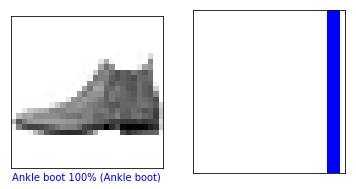

In [22]:
test_images_x = test_images.reshape(test_images.shape[0], 28, 28)

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images_x)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

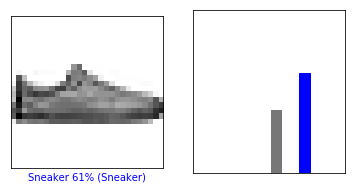

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images_x)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()


いくつかの画像をそれらの予測とともに表示してみましょう。正しい予測ラベルは青で、正しくない予測ラベルは赤です。数値は、予測ラベルの割合をパーセントで（最大100）表します。モデルの確信度が高くても、間違っているケースがありますね。


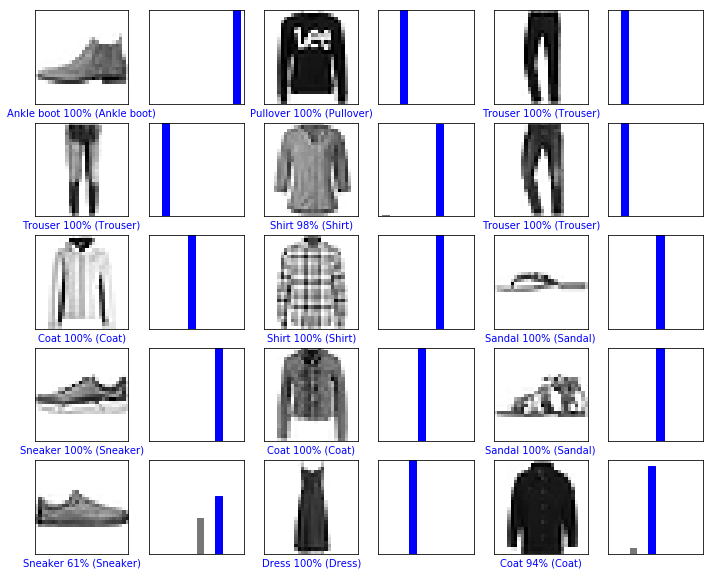

In [24]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images_x)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()


最後に、学習済みモデルを使い、ひとつの画像で推論します。 


In [0]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)



 `tf.keras`モデルは、一度に複数の入力を含む *バッチ* （集合）に対して推論を行うよう最適化されています。そのため、単一の画像で推論する場合でも、リストに画像を一つ追加し、それを入力として与える必要があります。 


In [0]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)



今度は画像を使い推論します。 


In [0]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.1596768e-06 7.0150348e-09 8.6171860e-07 7.7289496e-07 2.2113095e-06
  6.5428498e-03 6.9230744e-05 3.2286901e-02 3.0360929e-05 9.6106470e-01]]


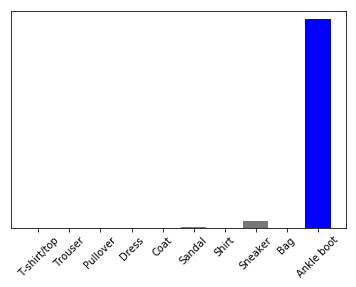

In [0]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()


 `model.predict`は、データのバッチ内の各画像に対して1つずつ、10個のラベルそれぞれの確信度のリストの、画像の数分のリストを返します。バッチ内の、画像の予測をひとつ取り出してみましょう。

In [0]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9



そして、以前と同様、モデルは9のラベル（アンクルブーツ）を予測します。 
